## Testing: &thinsp; featues of dataset

In [82]:
import xarray as xr
import numpy as np
from os.path import expanduser
home = expanduser("~")
import skimage.measure as skm
import matplotlib.pyplot as plt
import cartopy

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [83]:
def plot_scene(scene, cmap='Reds', title='', vmin=None, vmax=None, fig_width=20 ,fig_height=10):
    projection = cartopy.crs.PlateCarree(central_longitude=180)
    lat = scene.lat
    lon = scene.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(fig_width, fig_height))
    scene.plot(transform=cartopy.crs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())
    ax.set_title(title)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [84]:
model = 'GFDL-CM3'
experiments =[
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

variables = [
    # 'precip',
    # 'tas',
    # 'wap500',
    # 'wap',
    # 'cl',
    # 'hus',
    # 'hur',
]
variable = variables[0]

# ds = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '/' + model + '_' + variable + '_' + experiment + '.nc')
ds = xr.open_dataset(home + '/Documents/data/cmip5/ds/' + model + '_orig/' + model + '_' + variable + '_' + experiment + '.nc')
ds

<xarray.Dataset>
Dimensions:  (plev: 23, time: 360, lat: 36, lon: 144)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    hur      (time, plev, lat, lon) float32 ...

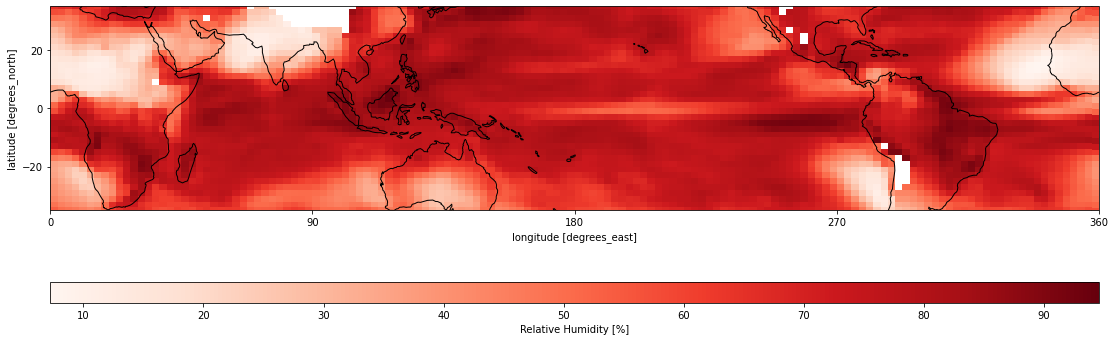

In [85]:
plot_scene(ds[variable].isel(time=0).sel(plev=850e2), 'Reds') #
# plot_scene(ds['cloud_high'].isel(time=0), 'Reds')

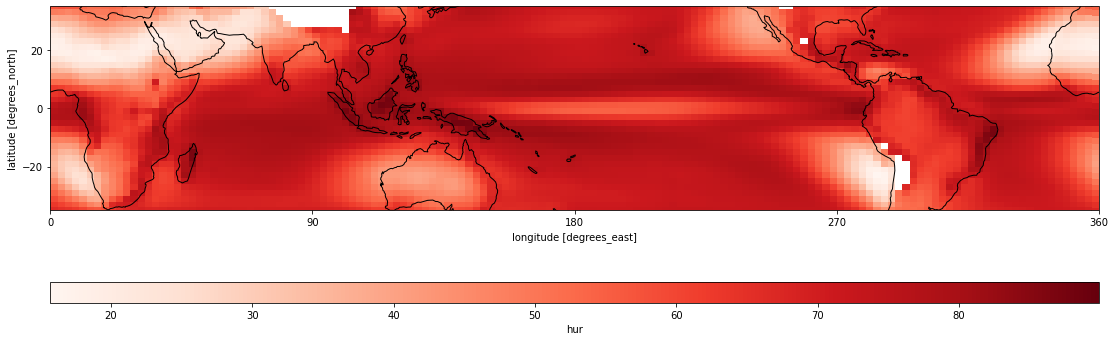

In [86]:
plot_scene(ds[variable].mean(dim ='time').sel(plev=850e2), 'Reds')
# plot_scene(ds['cloud_high'].mean(dim ='time'), 'Reds')